In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images.shape

(60000, 28, 28)

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

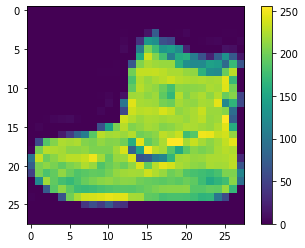

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

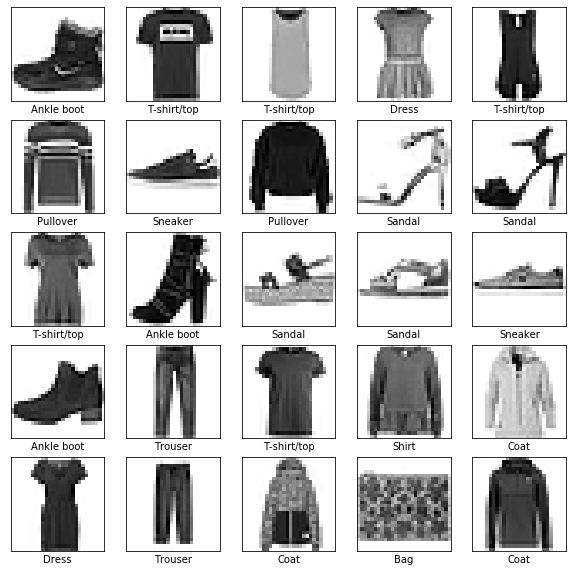

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
# baseline

baseline_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

baseline_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

baseline_model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = baseline_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4936 - accuracy: 0.8266
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3713 - accuracy: 0.8658
Epoch 3/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3354 - accuracy: 0.8779
Epoch 4/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3117 - accuracy: 0.8846
Epoch 5/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2924 - accuracy: 0.8913
Epoch 6/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2792 - accuracy: 0.8971
Epoch 7/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2673 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2566 - accuracy: 0.9051
Epoch 9/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2472 - accuracy: 0.9077
Epoch 10/10
60

In [8]:
one_conv_model = keras.Sequential([
    keras.layers.Conv2D(
        16, kernel_size=(3, 3), strides=(1, 1),
        activation='relu',
        input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

one_conv_model.summary()

one_conv_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_images_chan = train_images[..., tf.newaxis]
test_images_chan = test_images[..., tf.newaxis]

one_conv_model.fit(train_images_chan, train_labels, epochs=10)

test_loss, test_acc = one_conv_model.evaluate(test_images_chan, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               346240    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 196us/sample - loss: 0.4016 -

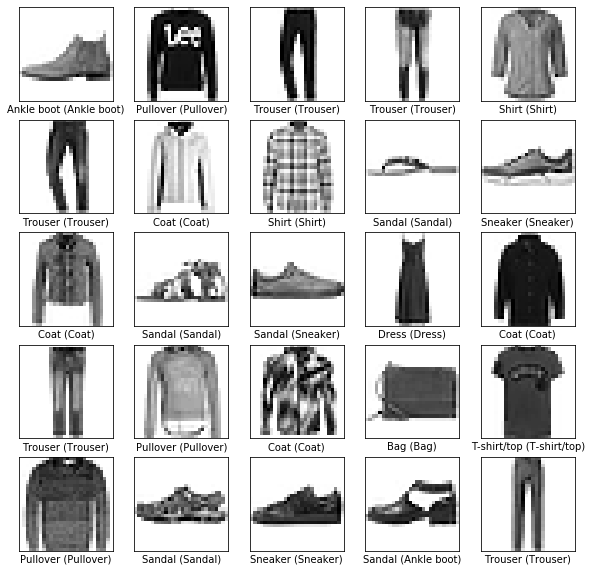

In [9]:
predictions = np.argmax(one_conv_model.predict(test_images_chan), axis=1)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[predictions[i]] + " (" + class_names[test_labels[i]] + ")")
   
plt.show()

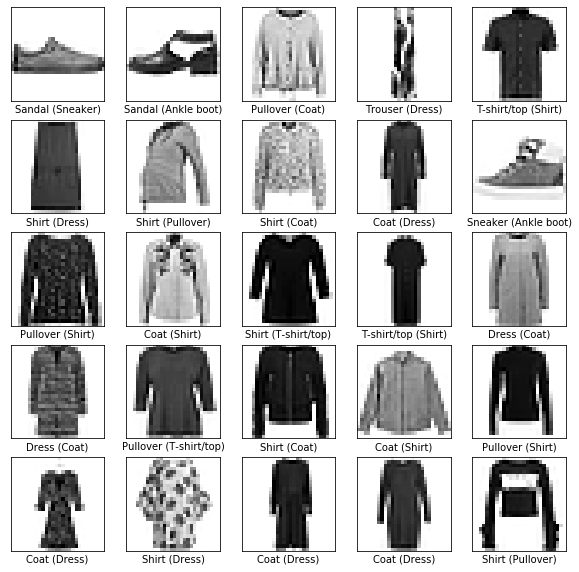

In [10]:
count, i = 0, 0

plt.figure(figsize=(10,10))
while count < 25:
    if predictions[i] != test_labels[i]:
        plt.subplot(5,5,count+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[predictions[i]] + " (" + class_names[test_labels[i]] + ")")
        
        count += 1
    i += 1
   
plt.show()

In [11]:
two_conv_model = keras.Sequential([
    keras.layers.Conv2D(
        16, kernel_size=(3, 3), strides=(1, 1),
        activation='relu',
        input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(
        32, kernel_size=(5, 5), strides=(1, 1),
        activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

two_conv_model.summary()

two_conv_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

two_conv_model.fit(train_images_chan, train_labels, epochs=10)

test_loss, test_acc = two_conv_model.evaluate(test_images_chan, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

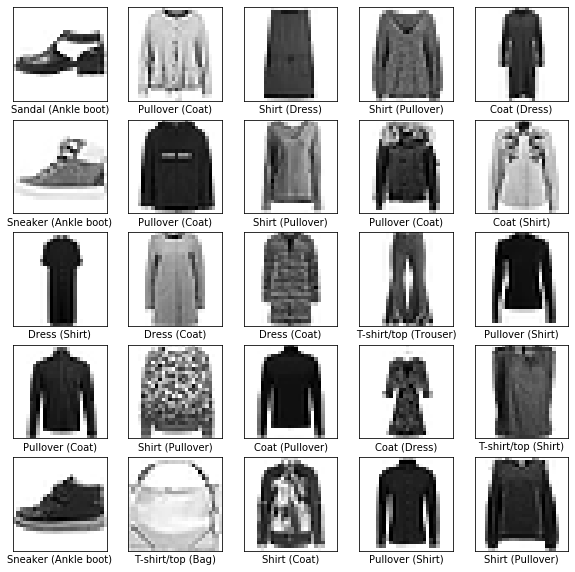

In [13]:
predictions = np.argmax(two_conv_model.predict(test_images_chan), axis=1)
count, i = 0, 0

plt.figure(figsize=(10,10))
while count < 25:
    if predictions[i] != test_labels[i]:
        plt.subplot(5,5,count+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[predictions[i]] + " (" + class_names[test_labels[i]] + ")")
        
        count += 1
    i += 1
   
plt.show()